In [2]:
#### Benjamin Tollison ####

import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy import  lambdify, Matrix 
import numpy as np
import matplotlib.pyplot as plt
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

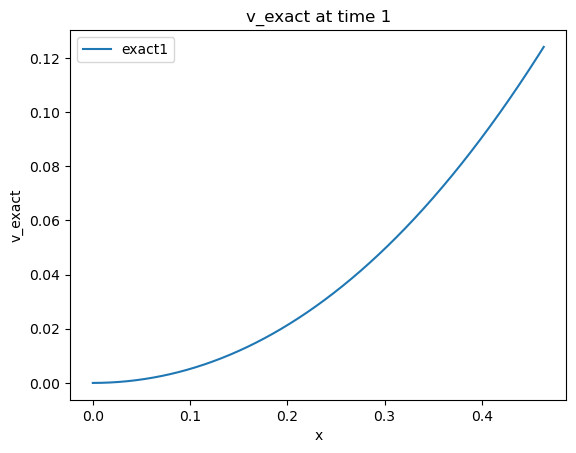

In [3]:
# Solving the analytical solution but with deltaT as a variable of x for t = 1
x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4 = sp.symbols('x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4')
deltaT_1 = 32-22.98 + 7.56*x + -0.844*x**2 + -0.0537*x*3 # pulled from the excel polynomial approximation
# separating the beam equations
    #equation 1
D4v1 = (-alpha_1*3)/(E_1*h) * deltaT_1.diff(x,2)
D3v1 = sp.integrate(D4v1, x) + A_1
D2v1 = sp.integrate(D3v1, x) + A_2
D1v1 = sp.integrate(D2v1, x) + A_3
v1 = sp.integrate(D1v1, x) + A_4
    # equation 2
D4v2 = (-alpha_2*3)/(E_2*h) * deltaT_1.diff(x,2)
D3v2 = sp.integrate(D4v2, x) + B_1
D2v2 = sp.integrate(D3v2, x) + B_2
D1v2 = sp.integrate(D2v2, x) + B_3
v2 = sp.integrate(D1v2, x) + B_4
displayEquations('v1',v1)
displayEquations('v2',v2)
# from inspection, A_1 = B_1, A_2 = B_2, A_3 = B_3, A_4 = B_4
v = v1 + (.211*alpha_2*x**4)/(E_2*h)
displayEquations('v',v)
# Setting boundary condtions
kbc1 = v1.subs({x:0})
kbc2 = v2.subs({x:0})
kbc3 = v1.diff(x).subs({x:0})
kbc4 = v2.diff(x).subs({x:0})
kbc5 = v1.subs({x:L}) - v2.subs({x:L})
kbc6 = v1.diff(x).subs({x:L}) - v2.diff(x).subs({x:L})
# solving the coefficients
dof = linsolve([kbc1,kbc2,kbc3,kbc4,kbc5,kbc6], [A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4])
(a_1,b_1,a_2,b_2,a_3,b_3,a_4,b_4) = next(iter(dof))
v_exact_t_1 = v1.subs({A_1:a_1,A_2:a_2,A_3:a_3,A_4:a_4,B_1:1,B_2:1,B_3:b_3,B_4:b_4})
v_exact_t_1 = v_exact_t_1.subs({E_1:69*10**6,E_2:200*10**6, alpha_1:2.22*10**-5,alpha_2:1.2**-5,h:.04,L:0.46355})
displayEquations('v_exact_t_1',v_exact_t_1)
# plotting the solution
v_exact_1 = lambdify([x], v_exact_t_1)
x_values = np.linspace(0,0.46355,1000)
plt.title('v_exact at time 1')
plt.plot(x_values, v_exact_1(x_values),label = '{}'.format('exact1'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_exact')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

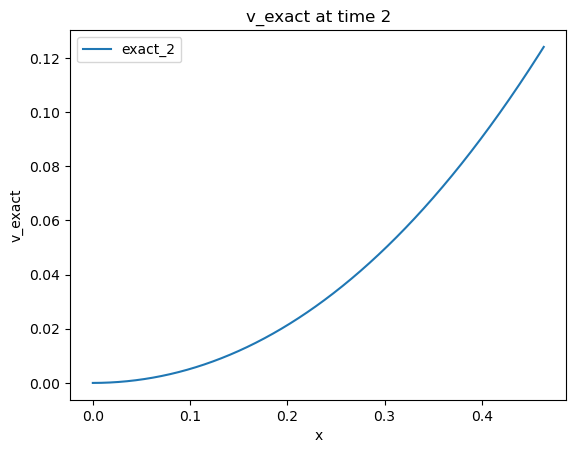

In [4]:
# Solving the analytical solution but with deltaT as a variable of x for t = 2
deltaT_1 = 45.4-22.98 + 9.95*x + 0.0802*x**2 + -0.251*x**3 
x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4 = sp.symbols('x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4')
# separating the beam equations
    #equation 1
D4v1 = (-alpha_1*3)/(E_1*h) * deltaT_1.diff(x,2)
D3v1 = sp.integrate(D4v1, x) + A_1
D2v1 = sp.integrate(D3v1, x) + A_2
D1v1 = sp.integrate(D2v1, x) + A_3
v1 = sp.integrate(D1v1, x) + A_4
    # equation 2
D4v2 = (-alpha_2*3)/(E_2*h) * deltaT_1.diff(x,2)
D3v2 = sp.integrate(D4v2, x) + B_1
D2v2 = sp.integrate(D3v2, x) + B_2
D1v2 = sp.integrate(D2v2, x) + B_3
v2 = sp.integrate(D1v2, x) + B_4
displayEquations('v1',v1)
displayEquations('v2',v2)
# from inspection, A_1 = B_1, A_2 = B_2, A_3 = B_3, A_4 = B_4
v = v1 + (.211*alpha_2*x**4)/(E_2*h)
displayEquations('v',v)
# Setting boundary condtions
kbc1 = v1.subs({x:0})
kbc2 = v2.subs({x:0})
kbc3 = v1.diff(x).subs({x:0})
kbc4 = v2.diff(x).subs({x:0})
kbc5 = v1.subs({x:L}) - v2.subs({x:L})
kbc6 = v1.diff(x).subs({x:L}) - v2.diff(x).subs({x:L})
# solving the coefficients
dof = linsolve([kbc1,kbc2,kbc3,kbc4,kbc5,kbc6], [A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4])
(a_1,b_1,a_2,b_2,a_3,b_3,a_4,b_4) = next(iter(dof))
v_exact_t_2 = v1.subs({A_1:a_1,A_2:a_2,A_3:a_3,A_4:a_4,B_1:1,B_2:1,B_3:b_3,B_4:b_4})
v_exact_t_2 = v_exact_t_2.subs({E_1:69*10**6,E_2:200*10**6, alpha_1:2.22*10**-5,alpha_2:1.2**-5,h:.04,L:0.46355})
displayEquations('v_exact_t_2',v_exact_t_1)
# plotting the solution
v_exact_2 = lambdify([x], v_exact_t_1)
plt.title('v_exact at time 2')
plt.plot(x_values, v_exact_2(x_values),label = '{}'.format('exact_2'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_exact')
plt.show()

<IPython.core.display.Math object>

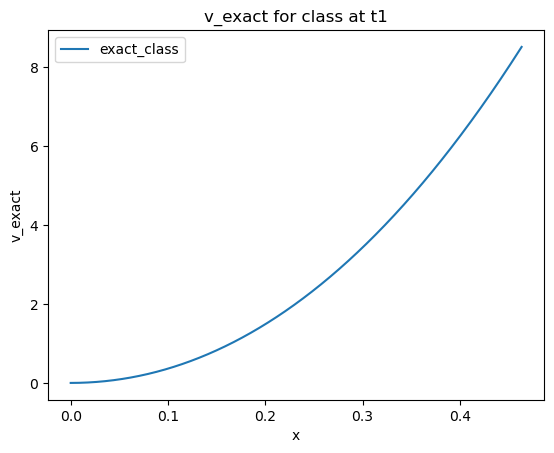

In [5]:
# comparing to the exact solution derived in class
E_avg = (E_1 + E_2) / 2
a,deltaT,A,a_1,a_2 = sp.symbols('a,deltaT,A,a_1,a_2')
deltaT = 32-22.98 + 7.56*x + -0.844*x**2 + -0.0537*x*3
B_z = (E_2 - E_1) * (2*a**3 / 3)
EI_z = 1/8 * sp.pi * a**4 * (E_1 + E_2)
F_T = ((E_1*alpha_1 + E_2*alpha_2) / 2) * sp.pi * a**2 * deltaT
M_T = (E_2*alpha_2 - E_1*alpha_1) * (2*a**3 / 3) * deltaT
D2v = (F_T*B_z - M_T*E_avg*A) / (B_z**2 - E_avg*A*EI_z)
# Solving for v and applying the boundary conditions at t1
Dv = sp.integrate(D2v, x) + a_1
v = sp.integrate(Dv, x) + a_2
kbc1 = v.subs({x:0})
kbc2 = Dv.subs({x:0})
dof = linsolve([kbc1, kbc2], [a_1, a_2])
(a_sol, b_sol) = next(iter(dof))
# plugging in the constants
v_class1 = v.subs({a_1:a_sol, a_2:b_sol,E_1:69*10**6,E_2:200*10**6, alpha_1:2.22*10**-5,alpha_2:1.2**-5,A:a*2,a:.2**2*sp.pi / 2})
displayEquations("v",v)
# plotting the solution
v_class1 = lambdify(x,v_class1)
plt.title('v_exact for class at t1')
plt.plot(x_values, v_class1(x_values),label = '{}'.format('exact_class'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_exact')
plt.show()

<IPython.core.display.Math object>

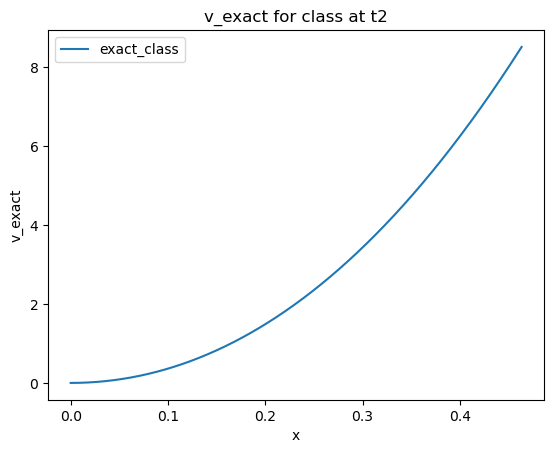

In [6]:
### doing the same for t2
deltaT = 45.4-22.98 + 9.95*x + 0.0802*x**2 + -0.251*x**3 
# Solving for v and applying the boundary conditions at t2
Dv = sp.integrate(D2v, x) + a_1
v = sp.integrate(Dv, x) + a_2
kbc1 = v.subs({x:0})
kbc2 = Dv.subs({x:0})
dof = linsolve([kbc1, kbc2], [a_1, a_2])
(a_sol, b_sol) = next(iter(dof))
# plugging in the constants
v = v.subs({a_1:a_sol, a_2:b_sol,E_1:69*10**6,E_2:200*10**6, alpha_1:2.22*10**-5,alpha_2:1.2**-5,A:a*2,a:.2**2*sp.pi / 2})
displayEquations("v",v.simplify())
# plotting the solution
v_class2 = lambdify(x,v)
plt.title('v_exact for class at t2')
plt.plot(x_values, v_class2(x_values),label = '{}'.format('exact_class'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_exact')
plt.show()

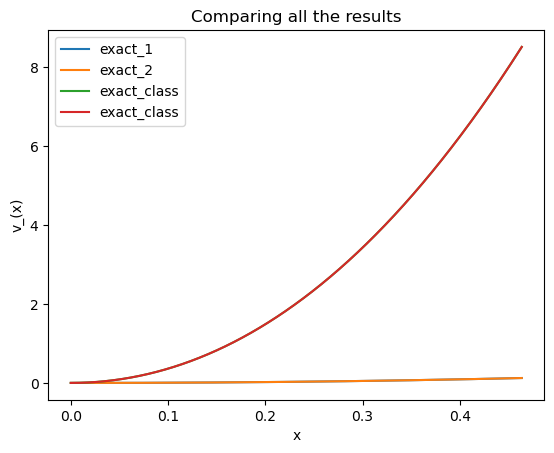

In [7]:
#### Comparing all the results ####
plt.title('Comparing all the results')
plt.plot(x_values, v_exact_1(x_values),label = '{}'.format('exact_1'))
plt.plot(x_values, v_exact_2(x_values),label = '{}'.format('exact_2'))
plt.plot(x_values, v_class1(x_values),label = '{}'.format('exact_class'))
plt.plot(x_values, v_class2(x_values),label = '{}'.format('exact_class'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_(x)')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

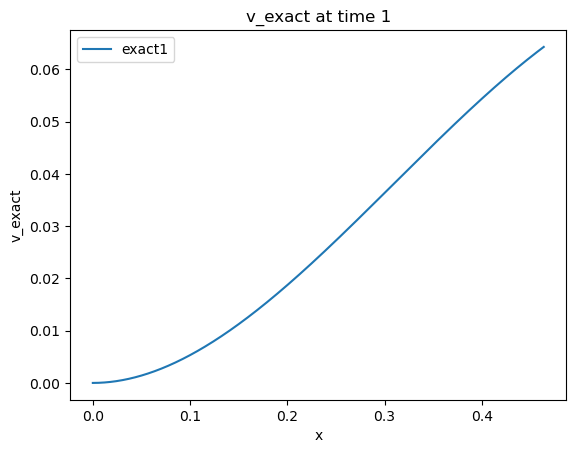

<IPython.core.display.Math object>

<IPython.core.display.Math object>

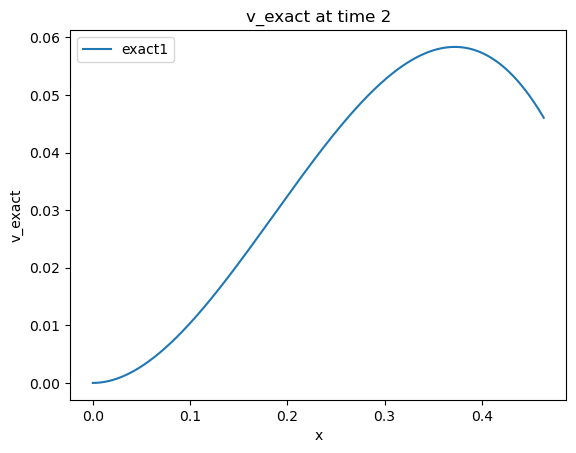

In [8]:
#### adding kinectic boundary conditions from gages
gage_position1 = 0.2286
gage_position2 = 0.41275
gage_vaule1 = 0.0235
gage_vaule2 = 0.0565
# finding new solution at t1
# Solving the analytical solution but with deltaT as a variable of x for t = 1
x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4 = sp.symbols('x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4')
deltaT_1 = 32-22.98 + 7.56*x + -0.844*x**2 + -0.0537*x*3 # pulled from the excel polynomial approximation
# separating the beam equations
    #equation 1
D4v1 = (-alpha_1*3)/(E_1*h) * deltaT_1.diff(x,2)
D3v1 = sp.integrate(D4v1, x) + A_1
D2v1 = sp.integrate(D3v1, x) + A_2
D1v1 = sp.integrate(D2v1, x) + A_3
v1 = sp.integrate(D1v1, x) + A_4
# from inspection, A_1 = B_1, A_2 = B_2, A_3 = B_3, A_4 = B_4
v = v1 + (.211*alpha_2*x**4)/(E_2*h)
displayEquations('v',v)
# Setting boundary condtions
kbc1 = v1.subs({x:0})
kbc2 = v1.diff(x).subs({x:0})
kbc3 = v1.subs({x:gage_position1}) - gage_vaule1
kbc4 = v1.subs({x:gage_position2}) - gage_vaule2
# solving the coefficients
dof = linsolve([kbc1,kbc2,kbc3,kbc4], [A_1,A_2,A_3,A_4])
(a_1,a_2,a_3,a_4) = next(iter(dof))
v_t_1 = v1.subs({A_1:a_1,A_2:a_2,A_3:a_3,A_4:a_4})
v_t_1 = v_t_1.subs({E_1:69*10**6,E_2:200*10**6, alpha_1:2.22*10**-5,alpha_2:1.2**-5,h:.04,L:0.46355})
displayEquations('v_t_1',v_t_1)
# plotting the solution
v_t_1 = lambdify([x], v_t_1)
x_values = np.linspace(0,0.46355,1000)
plt.title('v_exact at time 1')
plt.plot(x_values, v_t_1(x_values),label = '{}'.format('exact1'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_exact')
plt.show()
# gages kbc's at t2
gage_vaule3 = 0.039
gage_vaule4 = 0.0561
# Solving the analytical solution but with deltaT as a variable of x for t = 2
x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4 = sp.symbols('x,L,b,h,E_1,E_2,alpha_1,alpha_2,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4')
deltaT_1 = 32-22.98 + 7.56*x + -0.844*x**2 + -0.0537*x*3 # pulled from the excel polynomial approximation
# separating the beam equations
    #equation 1
D4v1 = (-alpha_1*3)/(E_1*h) * deltaT_1.diff(x,2)
D3v1 = sp.integrate(D4v1, x) + A_1
D2v1 = sp.integrate(D3v1, x) + A_2
D1v1 = sp.integrate(D2v1, x) + A_3
v1 = sp.integrate(D1v1, x) + A_4
# from inspection, A_1 = B_1, A_2 = B_2, A_3 = B_3, A_4 = B_4
v = v1 + (.211*alpha_2*x**4)/(E_2*h)
displayEquations('v',v)
# Setting boundary condtions
kbc1 = v1.subs({x:0})
kbc2 = v1.diff(x).subs({x:0})
kbc3 = v1.subs({x:gage_position1}) - gage_vaule3
kbc4 = v1.subs({x:gage_position2}) - gage_vaule4
# solving the coefficients
dof = linsolve([kbc1,kbc2,kbc3,kbc4], [A_1,A_2,A_3,A_4])
(a_1,a_2,a_3,a_4) = next(iter(dof))
v_t_2 = v1.subs({A_1:a_1,A_2:a_2,A_3:a_3,A_4:a_4})
v_t_2 = v_t_2.subs({E_1:69*10**6,E_2:200*10**6, alpha_1:2.22*10**-5,alpha_2:1.2**-5,h:.04,L:0.46355})
displayEquations('v_t_2',v_t_2)
# plotting the solution
v_t_2 = lambdify([x], v_t_2)
x_values = np.linspace(0,0.46355,1000)
plt.title('v_exact at time 2')
plt.plot(x_values, v_t_2(x_values),label = '{}'.format('exact1'))
plt.xlabel('x')
plt.legend()
plt.ylabel('v_exact')
plt.show()

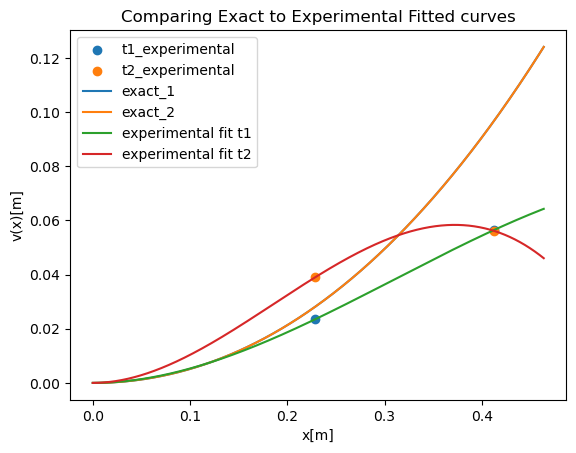

In [17]:
# Comparing the results of the two models
x_experimental = [gage_position1, gage_position2]
y_experimental_t1 = [gage_vaule1, gage_vaule2]
y_experimental_t2 = [gage_vaule3, gage_vaule4]
plt.title('Comparing Exact to Experimental Fitted curves')
plt.scatter(x_experimental, y_experimental_t1,label = '{}'.format('t1_experimental'))
plt.scatter(x_experimental, y_experimental_t2,label = '{}'.format('t2_experimental'))
plt.plot(x_values, v_exact_1(x_values),label = '{}'.format('exact_1'))
plt.plot(x_values, v_exact_2(x_values),label = '{}'.format('exact_2'))
plt.plot(x_values, v_t_1(x_values),label = '{}'.format('experimental fit t1'))
plt.plot(x_values, v_t_2(x_values),label = '{}'.format('experimental fit t2'))
plt.xlabel('x[m]')
plt.legend()
plt.ylabel('v(x)[m]')
plt.show()

In [14]:
# Finding the percent error between the exact solution and the experimental fitted curves
exact_vs_experimental_t1 = 0
for i in x_values:
    exact_vs_experimental_t1 += abs(v_exact_1(i) - v_t_1(i))
exact_vs_experimental_t1 /= len(x_values)
displayEquations('Percent error at t1', exact_vs_experimental_t1*100)
exact_vs_experimental_t2 = 0
for i in x_values:
    exact_vs_experimental_t2 += abs(v_exact_2(i) - v_t_2(i))
exact_vs_experimental_t2 /= len(x_values)
displayEquations('Percent error at t2', exact_vs_experimental_t2*100)

<IPython.core.display.Math object>

<IPython.core.display.Math object>